In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
c = pd.read_csv("unpacked.txt", delimiter="\t", header=None)
channel = np.array(c[0])
edge    = np.array(c[1])
time    = np.array(c[2])

In [3]:
c

,0,1,2
0,0,0,1.000000e+05
1,1,0,5.800500e+03
2,1,1,5.835400e+03
3,1,0,8.933000e+03
4,1,1,8.967800e+03
...,...,...,...
12740338,6,1,5.871848e+10
12740339,6,0,5.871849e+10
12740340,6,1,5.871849e+10
12740341,9,1,5.871840e+10


In [3]:
from IPython.display import clear_output

for _ in range(1000):
    clear_output(wait=True)
    display(_)

999

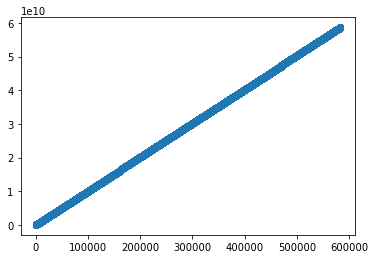

In [4]:
pp.plot(time[channel==0],'o-')
pp.show()

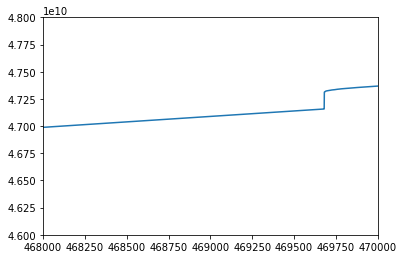

In [5]:
pp.plot(time[channel==0])
pp.xlim(46.8e4, 47e4)
pp.ylim(46e9, 48e9)
pp.show()

In [6]:
print("Total time :", len(time[channel==0])*1e5/1e9, "s")

Total time : 58.2777 s


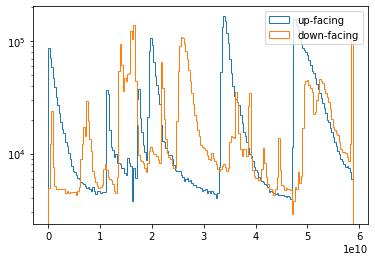

In [7]:
pp.hist(time[channel==1], bins=200, label="up-facing", histtype="step")
pp.hist(time[channel==5], bins=200, label="down-facing", histtype="step")
pp.yscale("log")
pp.legend()
pp.show()

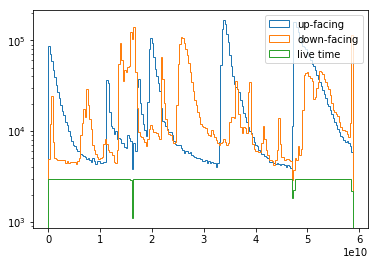

In [7]:
pp.hist(time[channel==1], bins=200, label="up-facing", histtype="step")
pp.hist(time[channel==5], bins=200, label="down-facing", histtype="step")
pp.hist(time[channel==0], bins=200, label="live time", histtype="step")
pp.yscale("log")
pp.legend()
pp.show()

In [45]:
ch1r = np.sort(times[np.where(np.logical_and(channel==1,edge==0))])
ch2r = np.sort(times[np.where(np.logical_and(channel==2,edge==0))])

len(ch1r)-len(ch2r)

1739850

In [15]:
import time

In [36]:
start = time.time()
keep = []
for i in range(len(ch1r)-1):
    pot_list = ch2r[np.where(np.logical_and(ch2r>ch1r[i],ch2r<ch1r[i+1]))]
    if len(pot_list)==0:
        keep.append(ch1r[i])
    elif len(pot_list)>1:
        #print("More than 1!!")
if ch2r[-1]<ch1r[-1]:  
    keep.append(ch1r[-1])

end = time.time()
deltat = end-start
sec = deltat % 60
minute = (deltat-sec)/60
print(minute,':',sec)

More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More than 1!!
More t

In [37]:
keep2 = []
start = time.time()
for i in range(len(ch1r)-1):
    high = ch2r - ch1r[i+1]
    low = ch2r - ch1r[i]
    
    positive_diff = len(low[low>0])-len(high[high>0])
    if positive_diff == 0:
        keep2.append(ch1r[i])

if ch2r[-1]<ch1r[-1]:  
    keep2.append(ch1r[-1])
end = time.time()
deltat = end-start
sec = deltat % 60
minute = (deltat-sec)/60
print(minute,':',sec)

88.0 : 36.613638162612915


In [47]:
len(keep)/len(ch1r)

0.7252202067085886